In [154]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white',palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [155]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.metrics import silhouette_score,accuracy_score,r2_score,confusion_matrix,mean_squared_error 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder 
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.cluster import KMeans 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [156]:
data = pd.read_csv(r'c:\\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')
data.head(3)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3


In [157]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [159]:
data.duplicated().sum()

0

In [160]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

mean_impu = SimpleImputer(strategy='mean', missing_values=np.NaN)
mis_cols = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT'] 
data[mis_cols] = mean_impu.fit_transform(data[mis_cols])
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

Category    0.0
Age         0.0
Sex         0.0
ALB         0.0
ALP         0.0
ALT         0.0
AST         0.0
BIL         0.0
CHE         0.0
CHOL        0.0
CREA        0.0
GGT         0.0
PROT        0.0
dtype: float64

In [161]:
le = LabelEncoder()

y = data.Category
true_labels = le.fit_transform(y)
data = pd.get_dummies(data,dtype=float)
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:title={'center':'Correlation Matrix'}>

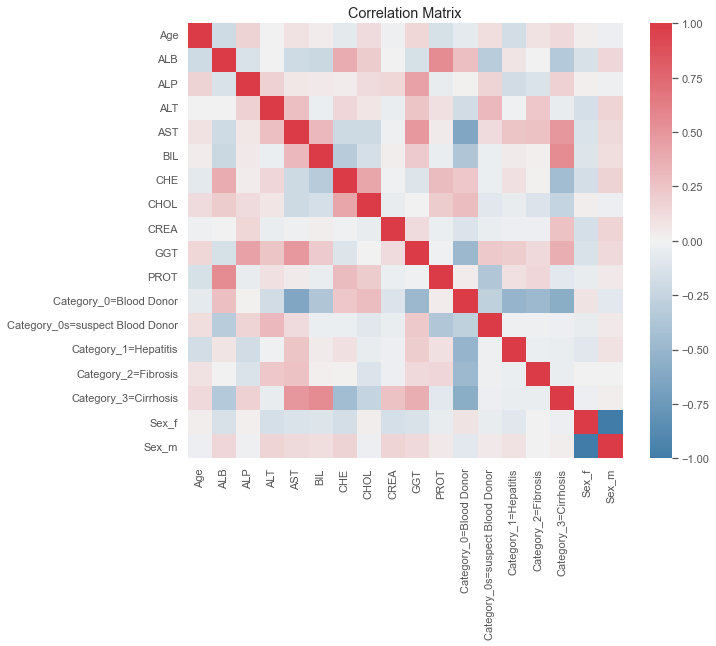

In [162]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

data_corr = data.corr()
sns.heatmap(data_corr, mask=np.zeros_like(data_corr,dtype=np.bool_),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax =ax)

In [163]:
le.classes_ 

n_clusters = len(le.classes_)

preprocessor = Pipeline ( 
    [ 
        ('scaler',MinMaxScaler()),
        ('pca',PCA(n_components=2,random_state=42))
    ]
)

clusterer = Pipeline( 
    [ 
        ( 
            'kmeans',
            KMeans( 
                n_clusters=n_clusters,
                init ='k-means++',
                n_init = 50,
                max_iter = 500,
                random_state=42,
            )
        )
    ]
)

pipe = Pipeline(
    [ 
        ('preprocessor',preprocessor),
        ('clusterer',clusterer)
    ]
)
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [164]:
preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe['clusterer']['kmeans'].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.945683640137728

In [165]:
data['predicted_labels'] = predicted_labels 
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m,predicted_labels
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3


In [166]:
data.drop(columns=['predicted_labels'],axis=1,inplace=True)
data 

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


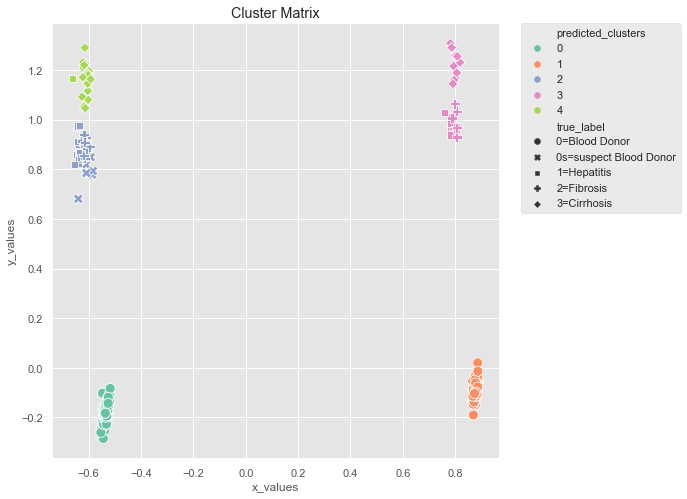

In [167]:
pcdaf = pd.DataFrame( 
    preprocessed_data,columns=['x_values','y_values']
)

pcdaf['predicted_clusters'] = predicted_labels 
pcdaf['true_label'] = le.inverse_transform(true_labels)

plt.figure(figsize=(8,8))
scat = sns.scatterplot( 
    x = 'x_values',
    y = 'y_values',
    data = pcdaf,
    s=100,
    hue = 'predicted_clusters',
    style='true_label',
    palette='Set2'
)

scat.set_title('Cluster Matrix')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)